# Trend Estimation: Data Example

![title](https://i.imgur.com/FZbMhv1.png)

In [1]:
data = read.table('~/Desktop/GT-TSeries/Data/1 - AvTempAtlanta.txt', header=T)
head(data)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5,61.8
1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1,62.3
1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6,62.4
1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4,62.3
1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0,62.0
1884,35.9,51.7,54.4,58.4,70.7,71.1,77.7,75.3,74.9,68.1,51.3,44.5,61.2


In [2]:
names(data)

[1] "Year"   "Jan"    "Feb"    "Mar"    "Apr"    "May"    "Jun"    "Jul"   
 [9] "Aug"    "Sep"    "Oct"    "Nov"    "Dec"    "Annual"

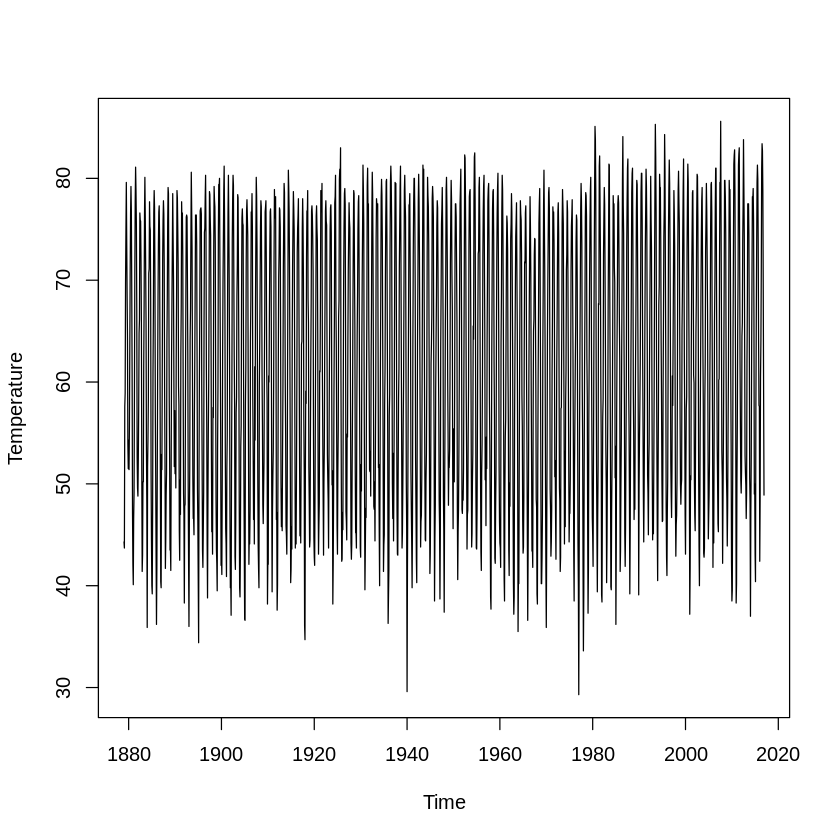

In [3]:
temp = as.vector(t(data[, -c(1, 14)])) # Stack rows to form a vector, thus the transpose
temp = ts(temp, start = 1879, frequency = 12)
ts.plot(temp, ylab='Temperature')

![title](https://i.imgur.com/BqklM7W.png)

![title](https://i.imgur.com/WIKI1Ay.png)

![title](https://i.imgur.com/q6hFIA0.png)

In [4]:
## Create equally spaced time points for fitting trends
time.pts = c(1:length(temp))
time.pts = c(time.pts - min(time.pts)) / max(time.pts)

In [5]:
## Fit a Moving Average
help(ksmooth)
mav.fit = ksmooth(time.pts, temp, kernel = 'box')
temp.fit.mav = ts(mav.fit$y, start=1902, frequency=12)

## Comparing the fitted trend line against the constant average line

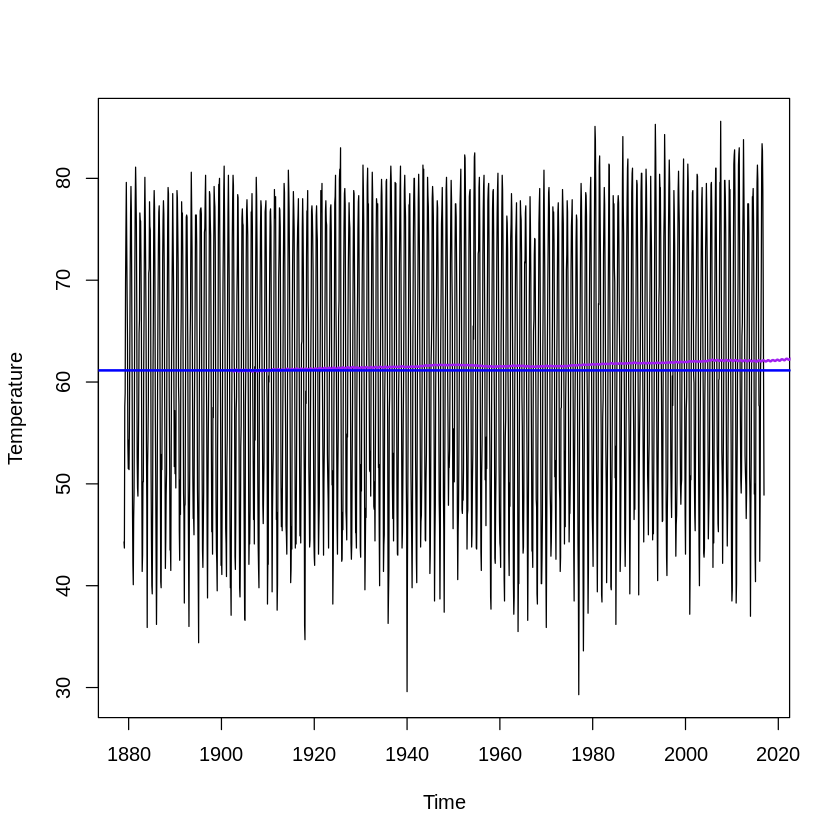

In [6]:
## Visualize: is there a trend?
ts.plot(temp, ylab='Temperature')
lines(temp.fit.mav, lwd=2, col='purple')
abline(temp.fit.mav[1], 0, lwd=2, col='blue')

![title](https://i.imgur.com/oB4daPJ.png)

In [7]:
## Fit a parametric quadratic polynomial
x1 = time.pts
x2 = time.pts ^ 2
lm.fit = lm(temp ~ x1 + x2)
summary(lm.fit)


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


### Note here that the independent variables are not significant.

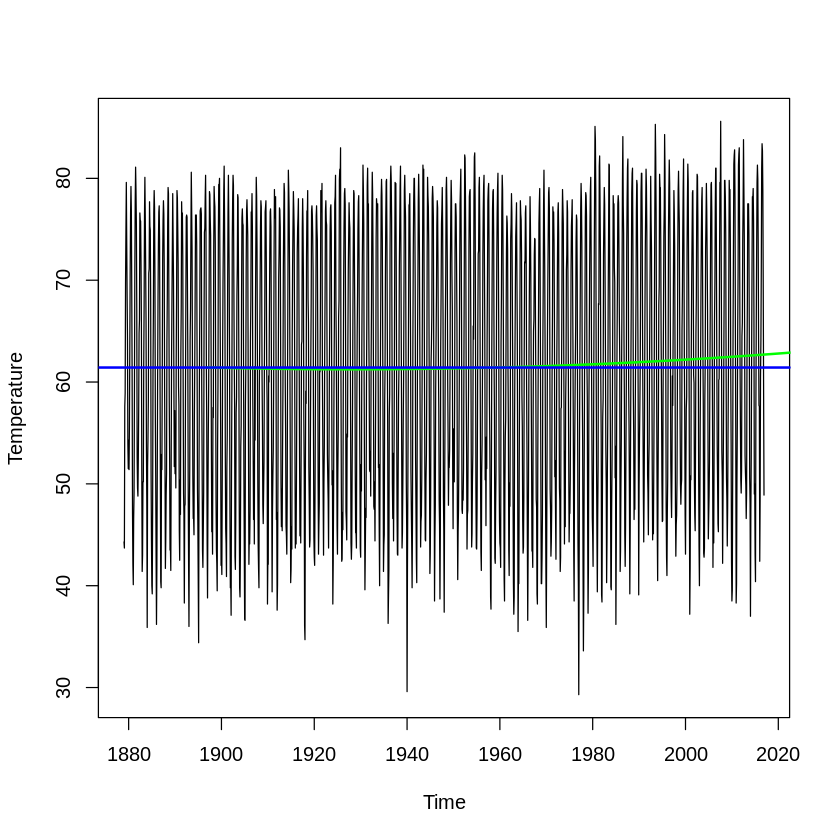

In [8]:
## Is there a trend?
temp.fit.lm = ts(fitted(lm.fit), start=1897, frequency=12)
ts.plot(temp, ylab='Temperature')
lines(temp.fit.lm, lwd=2, col='green')
abline(temp.fit.lm[1], 0, lwd=2, col='blue')

![title](https://i.imgur.com/w0HNVtq.png)

In [10]:
## Local Polynomial Trend Estimation
loc.fit = loess(temp ~ time.pts)
temp.fit.loc = ts(fitted(loc.fit), start=1879, frequency=12)
## Splines Trend Estimation
library(mgcv)
gam.fit = gam(temp ~ s(time.pts))
temp.fit.gam = ts(fitted(gam.fit), start=1879, frequency=12)

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.


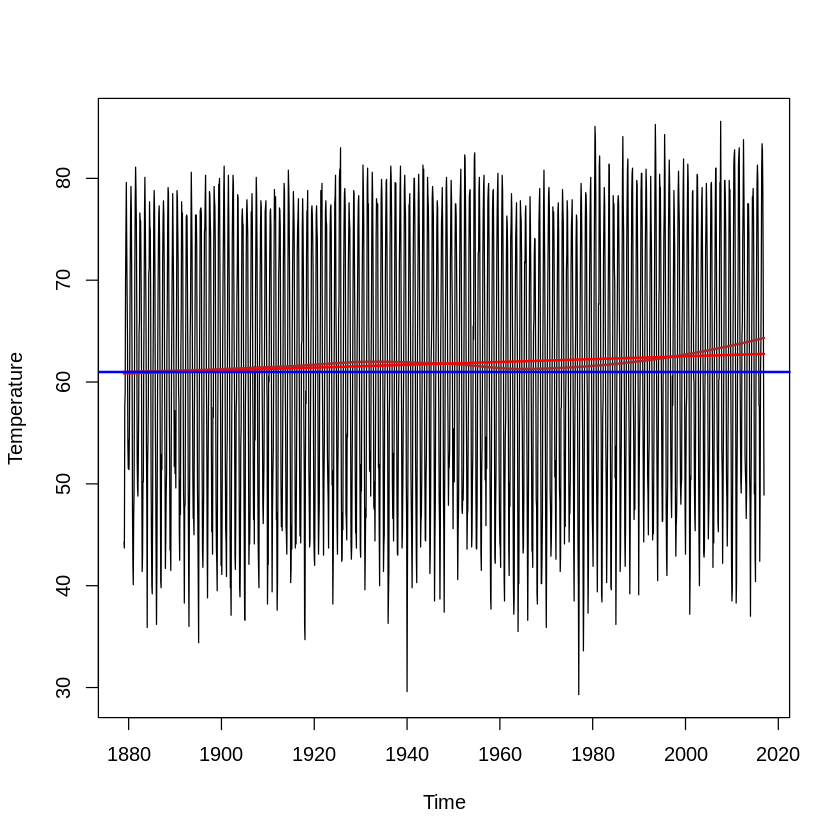

In [11]:
ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

![title](https://i.imgur.com/FL9tFWX.png)

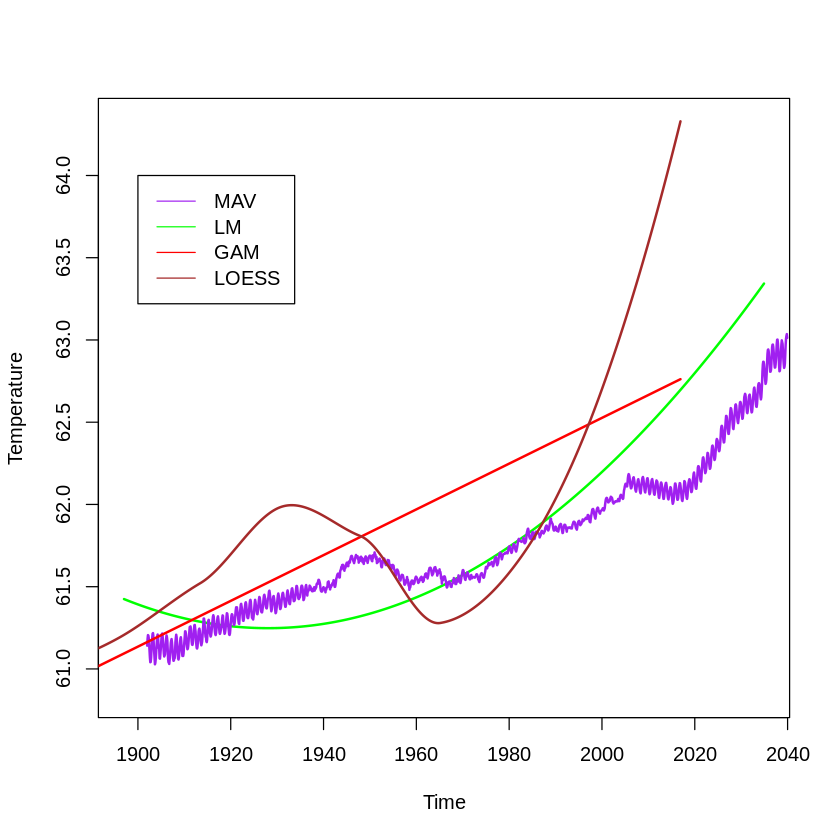

In [12]:
## Compare all estimated trends
all.val = c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim= c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))

# Conclusion

### 1.The moving average model captures some seasonality, thus not a good model
### 2. The parametric polynomial estimate is comparable to the splines regression, except that the parametric shows a quadratic trend, but nonetheless capturing a similar increasing trend
### 3. The local polynomial regression shows more complexity in the trend with smooth ups and downs
### 4. Overall, the model shows in the last 200 years, there is a 2 degree increase in temperature approximately